# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Makruf Alkarkhi
- **Email:** makrufalkarkhi.work@gmail.com
- **ID Dicoding:** thisisalkar

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren jumlah transaksi (order) dan total pendapatan (revenue) dari waktu ke waktu (bulanan), serta apakah keduanya menunjukkan pola pertumbuhan yang sejalan?
2. Produk kategori apa yang memiliki performa penjualan terbaik dan terburuk berdasarkan jumlah item terjual?
3. Bagaimana distribusi pelanggan dan transaksi berdasarkan metode pembayaran serta wilayah (state & city), dan apa implikasinya terhadap perilaku pelanggan?
4. RFM (Recency, Frequency, Monetary) Analysis

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Memuat dan menampilkan baris awal data customers
customers_df = pd.read_csv("data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
# Memuat dan menampilkan baris awal data orders
orders_df = pd.read_csv("data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
#  Memuat dan menampilkan baris awal data order items
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
# Memuat dan menampilkan baris awal data order payments
order_payments_df = pd.read_csv("data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
# Memuat dan menampilkan baris awal data products
products_df = pd.read_csv("data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [7]:
# Memuat dan menampilkan baris awal data product category name translation
product_category_df = pd.read_csv("data/product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Dataset E-Commerce Public terdiri dari beberapa tabel yang saling berelasi, yaitu data customers, orders, order_items, order_payments, order_reviews, products, product_category, sellers, dan geolocation.
- Seluruh dataset berhasil dimuat dan siap untuk dilakukan proses asessing data pada tahap selanjutnya.


### Assessing Data

#### Menilai tabel `customers_df`

In [8]:
# Menampilkan struktur data dan tipe kolom
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [9]:
# Mengecek jumlah nilai kosong pada tiap kolom
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [10]:
# Mengecek jumlah data duplikat
print("Jumlah duplikasi:", customers_df.duplicated().sum())

Jumlah duplikasi: 0


In [11]:
# Menampilkan ringkasan statistik data numerik
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
- Tidak ditemukan missing values maupun data duplikat pada tabel customers.
- Seluruh kolom telah memiliki tipe data yang sesuai.

#### Menilai tabel `orders_df`

In [12]:
# Menampilkan struktur data dan tipe kolom
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [13]:
# Mengecek jumlah nilai kosong pada tiap kolom
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [14]:
# Mengecek jumlah nilai uniik pada tiap kolom
orders_df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [15]:
# Mengecek jumlah data duplikat
print("Jumlah duplikasi:", orders_df.duplicated().sum())

Jumlah duplikasi: 0


In [16]:
# Menampilkan ringkasan statistik data numerik
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**
- Terdapat missing values pada kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date`.
- Seluruh kolom timestamp masih bertipe object dan perlu dikonversi ke tipe datetime pada tahap Cleaning Data.
- Tidak ditemukan data duplikat pada tabel orders.

#### Menilai tabel `order_items_df`

In [17]:
#  Menampilkan informasi struktur data dan tipe kolom
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [18]:
# Mengecek jumlah nilai kosong pada tiap kolom
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [19]:
# Mengecek jumlah nilai unik pada tiap kolom
order_items_df.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [20]:
# Mengecek jumlah data duplikat
print("Jumlah duplikasi:", order_items_df.duplicated().sum())

Jumlah duplikasi: 0


In [21]:
# Mengecek ringkasan statistik data numerik
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- Tidak ditemukan missing values maupun data duplikat pada tabel order_items.
- Kolom `shipping_limit_date` masih bertipe object dan perlu dikonversi ke tipe datetime pada tahap Cleaning Data jika data tersebut dibutuhkan.

#### Menilai tabel `order_payments_df`

In [22]:
# Menampilkan informasi struktur data dan tipe kolom
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [23]:
# Mengecek jumlah nilai kosong pada tiap kolom
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [24]:
# Mengecek jumlah data duplikat
print("Jumlah duplikasi:", order_payments_df.duplicated().sum())

Jumlah duplikasi: 0


In [25]:
# Menampilkan ringkasan statistik data numerik
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**
- Tidak ditemukan missing values maupun data duplikat pada tabel order_payments.
- Nilai payment_installments dan payment_value bernilai 0 ditemukan dan masih valid, misalnya untuk pembayaran non-kartu kredit atau penggunaan voucher.


#### Menilai tabel `products_df`

In [26]:
# Menampilkan struktur data dan tipe kolom
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [27]:
# Mengecek jumlah nilai kosong pada tiap kolom
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [28]:
# Mengecek jumlah data duplikat
print("Jumlah duplikasi:", products_df.duplicated().sum())

Jumlah duplikasi: 0


In [29]:
# Menampilkan ringkasan statistik data numerik
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- Terdapat missing values pada kolom `product_category_name`, `product_name_length`, `product_description_length`, dan `product_photos_qty`.
- Terdapat sedikit missing values pada kolom dimensi produk (`product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`).
- Tidak ditemukan data duplikat pada tabel products.


#### Menilai tabel `product_category_df`

In [30]:
# Menampilkan struktur data dan tipe kolom
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [31]:
# Mengecek jumlah nilai kosong pada tiap kolom
product_category_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [32]:
# Mengecek jumlah data duplikat
print("Jumlah duplikasi", product_category_df.duplicated().sum())

Jumlah duplikasi 0


In [33]:
# Menampilkan ringkasan statistik data numerik
product_category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
- Tidak ditemukan missing values maupun data duplikat.
- Struktur dan tipe data sudah sesuai.

### Cleaning Data

#### Membersihkan tabel `customers_df`

##### Irrelevant features

In [34]:
# Memilih kolom yang relevan untuk analisis
customers_filtered_df = customers_df[[
    "customer_id",
    "customer_city",
    "customer_state"
]].copy()

In [35]:
# Menampilkan baris awal data
customers_filtered_df.head()

,customer_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP


**Insight:**
- Pada tabel customers, tidak ditemukan permasalahan data seperti missing values, data duplikat, ketidaksesuaian tipe data, maupun inaccurate values pada kolom yang digunakan.
- Oleh karena itu, proses data cleaning pada tabel ini hanya difokuskan pada penghapusan kolom yang tidak relevan dengan analisis selanjutnya.

#### Membersihkan tabel `orders_df`

##### Missing values

In [36]:
# Mengecek jumlah nilai kosong pada tiap kolom 
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [37]:
# Memfilter data orders dengan order status yang hanya bernilai delivered
orders_filtered_df = orders_df[orders_df["order_status"] == "delivered"].copy()
orders_filtered_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [38]:
# Mengecek jumlah nilai kosong pada tiap kolom 
orders_filtered_df.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

In [39]:
# Menampilkan data order delivered customer date yang bernilai kosong
orders_filtered_df[orders_filtered_df['order_delivered_customer_date'].isna() == True]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaN,2018-07-24 00:00:00
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaN,NaN,2017-06-23 00:00:00
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaN,2018-06-26 00:00:00
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaN,2018-07-19 00:00:00


##### Irrelevant features

In [40]:
# Memilih kolom yang relevan untuk analisis
orders_filtered_df = orders_filtered_df [[
        "order_id",
        "customer_id",
        "order_purchase_timestamp",
        "order_status",
        "order_delivered_customer_date"
]].copy()

In [41]:
# Menampilkan baris awal data
orders_filtered_df.head()

,order_id,customer_id,order_purchase_timestamp,order_status,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,delivered,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,delivered,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,delivered,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,delivered,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,delivered,2018-02-16 18:17:02


##### Memperbaiki tipe data

In [42]:
# Menentukan kolom yang ingin diubah tipe datanya
datetime_columns = ["order_purchase_timestamp", "order_delivered_customer_date"]
# Mengonversi kolom yang telah dipilih ke format date time
for column in datetime_columns:
    orders_filtered_df[column] = pd.to_datetime(orders_filtered_df[column])

In [43]:
# Menampilkan struktur data dan tipe data tiap kolom
orders_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96478 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96478 non-null  object        
 1   customer_id                    96478 non-null  object        
 2   order_purchase_timestamp       96478 non-null  datetime64[ns]
 3   order_status                   96478 non-null  object        
 4   order_delivered_customer_date  96470 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 4.4+ MB


**Insight:**
- Data pada tabel `orders` difilter hanya untuk pesanan dengan status `delivered`, karena hanya transaksi yang telah selesai dan benar-benar terjadi yang relevan untuk analisis pendapatan dan perilaku pelanggan.
- Setelah proses filtering, masih terdapat sejumlah kecil missing values pada kolom `order_delivered_customer_date` dan `order_delivered_carrier_date`. Jumlahnya sangat kecil dibandingkan total data sehingga tidak berdampak signifikan terhadap hasil analisis.
- Missing values pada kolom tanggal pengiriman tidak diisi atau diimputasi karena analisis RFM hanya memerlukan kolom `order_purchase_timestamp`, serta pengisian nilai dengan asumsi tertentu berisiko menghasilkan data yang tidak akurat.
- Beberapa kolom yang tidak relevan dengan tujuan analisis dihapus untuk menyederhanakan dataset dan mempermudah proses analisis selanjutnya.
- Kolom `order_purchase_timestamp` dan `order_delivered_customer_date` telah dikonversi ke tipe data `datetime`, sehingga siap digunakan untuk analisis berbasis waktu seperti analisis bulanan atau tahunan.


#### Membersihkan tabel `order_items_df`

##### Irrelevant features

In [44]:
# Memilih kolom yang relevan untuk analisis
order_items_filtered_df = order_items_df [[
    "order_id",
    "order_item_id",
    "product_id"
]].copy()

In [45]:
# Menampilkan baris awal data
order_items_filtered_df.head()

,order_id,order_item_id,product_id
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089


**Insight:**
- Pada tabel `order_items`, hanya kolom `order_id`, `order_item_id`, dan `product_id` yang dipertahankan karena kolom tersebut sudah mencukupi untuk menganalisis jumlah dan jenis produk yang dibeli oleh pelanggan.
- Kolom lain seperti `seller_id`, `shipping_limit_date`, `price`, dan `freight_value` dihapus karena tidak relevan dengan tujuan analisis kategori produk serta tidak digunakan dalam analisis RFM maupun pendapatan.
- Tidak ditemukan permasalahan missing values, data duplikat, ketidaksesuaian tipe data, maupun inaccurate value pada kolom yang digunakan, sehingga tidak diperlukan proses pembersihan data lanjutan.


#### Membersihkan tabel `order_payments_df`

##### Irrelevant features

In [46]:
# Memilih kolom yang relevan untuk analisis
order_payments_filtered_df = order_payments_df [[
    "order_id",
    "payment_type",
    "payment_value"
]].copy()

In [47]:
# Menampilkan baris awal data
order_payments_filtered_df.head()

,order_id,payment_type,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,128.45


**Insight:**
- Pada tabel `order_payments`, tidak ditemukan permasalahan data seperti missing values, data duplikat, ketidaksesuaian tipe data, maupun inaccurate value.
- Kolom `order_id`, `payment_type`, dan `payment_value` dipertahankan karena digunakan untuk analisis pendapatan serta distribusi metode pembayaran.
- Kolom lain seperti `payment_sequential` dan `payment_installments` dihapus karena tidak memberikan pengaruh langsung terhadap analisis utama.

#### Membersihkan tabel `products_df`

##### Irrelevant features

In [48]:
# Memilih kolom yang relevan untuk analisis
products_filtered_df = products_df [[
    "product_id",
    "product_category_name"
]].copy()

In [49]:
# Menampilkan baris awal data
products_filtered_df.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


##### Missing values

In [50]:
# Mengecek jumlah data kosong pada tiap kolom
products_filtered_df.isna().sum()

product_id                 0
product_category_name    610
dtype: int64

In [51]:
# Menampilkan data kolom product category name yang bernilai kosong
products_filtered_df[products_filtered_df["product_category_name"].isna() == True]

,product_id,product_category_name
105,a41e356c76fab66334f36de622ecbd3a,NaN
128,d8dee61c2034d6d075997acef1870e9b,NaN
145,56139431d72cd51f19eb9f7dae4d1617,NaN
154,46b48281eb6d663ced748f324108c733,NaN
197,5fb61f482620cb672f5e586bb132eae9,NaN
...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN
32772,fa51e914046aab32764c41356b9d4ea4,NaN


In [52]:
# Mengisi data yang kosong pada kolom product category name dengan "Unknown"
products_filtered_df["product_category_name"] = (products_filtered_df["product_category_name"].fillna("Unknown"))

In [53]:
# Mengecek jumlah data kosong pada tiap kolom
products_filtered_df.isna().sum()

product_id               0
product_category_name    0
dtype: int64

**Insight:**
- Dari tabel `products_df`, hanya kolom `product_id` dan `product_category_name` yang digunakan karena kolom lain (ukuran, berat, panjang nama, dll) tidak relevan dengan tujuan analisis kategori produk.
- Setelah pemilahan kolom, ditemukan missing values pada kolom `product_category_name` sebanyak 610 data.
- Missing values tersebut tidak dihapus, melainkan diisi dengan label `"Unknown"` agar:
  - Data produk tetap dapat digunakan saat digabung dengan tabel lain.
  - Produk tanpa kategori tetap terhitung dalam analisis penjualan per kategori.

## Exploratory Data Analysis (EDA)

### Explore `customers_df`

In [54]:
# Menampilkan 5 data secara acak
customers_filtered_df.sample(5)

,customer_id,customer_city,customer_state
722,7c842c2505f4d3650b86f949b1bb456f,rio formoso,PE
36169,78507601d58635378ae8d1b0fb325a0b,ipatinga,MG
43714,6abca237f70bf072ffb9855407d08873,rio de janeiro,RJ
41401,d07897d21fdfac812af18def89603986,barueri,SP
67922,3306b138f542d4f9ad7d9b59ffe3b83e,angra dos reis,RJ


In [55]:
# Menampilkan ringkasan statistik seluruh kolom
customers_filtered_df.describe(include="all")

,customer_id,customer_city,customer_state
count,99441,99441,99441
unique,99441,4119,27
top,274fa6071e5e17fe303b9748641082c8,sao paulo,SP
freq,1,15540,41746


In [56]:
# Mengecek apakah customer id bersifat unik
customers_filtered_df.customer_id.is_unique

True

In [57]:
# Mengecek adanya duplikasi pada kolom customer id 
customers_filtered_df.customer_id.duplicated

<bound method Series.duplicated of 0        06b8999e2fba1a1fbc88172c00ba8bc7
1        18955e83d337fd6b2def6b18a428ac77
2        4e7b3e00288586ebd08712fdd0374a03
3        b2b6027bc5c5109e529d4dc6358b12c3
4        4f2d8ab171c80ec8364f7c12e35b23ad
                       ...               
99436    17ddf5dd5d51696bb3d7c6291687be6f
99437    e7b71a9017aa05c9a7fd292d714858e8
99438    5e28dfe12db7fb50a4b2f691faecea5e
99439    56b18e2166679b8a959d72dd06da27f9
99440    274fa6071e5e17fe303b9748641082c8
Name: customer_id, Length: 99441, dtype: object>

In [58]:
# Menghitung jumlah customer pada setiap city dan mengurutkannya dari yang terbanyak
customers_filtered_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo             15540
rio de janeiro         6882
belo horizonte         2773
brasilia               2131
curitiba               1521
                      ...  
ponto novo                1
populina                  1
porteiras                 1
portela                   1
pitanga de estrada        1
Name: customer_id, Length: 4119, dtype: int64

In [59]:
# Menghitung jumlah customer pada setiap state dan mengurutkannya dari yang terbanyak
customers_filtered_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: customer_id, dtype: int64

In [60]:
customer_id_in_orders_filtered_df =  set(
    orders_filtered_df["customer_id"].unique()
)
# Memberi status Active atau Non Active pada customer
# berdasarkan keberadaan customer_id pada data order
customers_filtered_df["status"] = customers_filtered_df["customer_id"].apply(
    lambda x: "Active" if x in customer_id_in_orders_filtered_df else "Non Active"
)

In [61]:
# Menampilkan 5 data secara acak
customers_filtered_df.sample(5)

,customer_id,customer_city,customer_state,status
30216,b89ea39218763f0521b7bbae37e90aa8,itapevi,SP,Active
62690,b0a35e98a28ce055c5090da452a82973,curitiba,PR,Active
43032,31a317f8c2ed13578e35d87fd51754a3,sao paulo,SP,Active
23172,c96771504b0c9d89ad8da161e0e3d092,taubate,SP,Non Active
26564,6a122bcedf65452b1002d0fc3758c531,cotia,SP,Active


In [62]:
# Menghitung jumlah customer yang active dan non active
customers_filtered_df.groupby(by="status").customer_id.count()

status
Active        96478
Non Active     2963
Name: customer_id, dtype: int64

**Insight:**
- Tabel `customers_filtered_df` terdiri dari 99.441 pelanggan unik, yang ditunjukkan oleh tidak adanya duplikasi pada kolom `customer_id`.
- Pelanggan tersebar di 4.119 kota dan 27 state, menunjukkan cakupan data yang luas di seluruh wilayah Brasil.
- Kota dengan jumlah pelanggan terbanyak adalah Sao Paulo, diikuti oleh Rio de Janeiro dan Belo Horizonte.
- State dengan jumlah pelanggan tertinggi adalah SP, disusul oleh RJ dan MG.
- Konsentrasi pelanggan yang tinggi di kota dan state besar mengindikasikan wilayah tersebut berpotensi menjadi kontributor utama terhadap transaksi dan pendapatan.
- Terdapat **96.478 customer Active** melakukan transaksi delivered **2.963 customer Non Active** tidak memiliki transaksi delivered, sehingga belum berkontribusi pada aktivitas penjualan.

### Explore `orders_df`

In [63]:
# Menampilkan 5 data secara acak
orders_filtered_df.sample(5)

,order_id,customer_id,order_purchase_timestamp,order_status,order_delivered_customer_date
8001,75979ee68f846e2cb2439240380d5291,31a1c5b7de452ef4df17b68fc97ef3f0,2018-06-26 01:04:08,delivered,2018-07-10 22:58:54
48021,0bafeaa6d78ca1e9b198fe9a6d645306,4c35c98b5a1affc77279a0d51c4e4975,2018-04-16 20:07:14,delivered,2018-05-17 19:16:27
57648,be7cd2ed9b40294805a5db0da7b36af8,a05c1061e47b0b88ad4aff4203ce64d9,2017-11-30 16:08:28,delivered,2017-12-03 13:05:16
84836,92c6c7adf4c5b367d2da122056510dbd,c746781a7b58448db766072fe76b94bf,2018-04-18 17:42:25,delivered,2018-04-25 21:32:13
28251,56610fa87188c93ee5993a5e98a7b092,2bc660beaeab7f3089e8ce729b054c74,2018-08-27 19:26:54,delivered,2018-08-30 20:32:36


In [64]:
# Menampilkan ringkasan statistik seluruh kolom
orders_filtered_df.describe(include="all")

,order_id,customer_id,order_purchase_timestamp,order_status,order_delivered_customer_date
count,96478,96478,96478,96478,96470
unique,96478,96478,NaN,1,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,NaN,delivered,NaN
freq,1,1,NaN,96478,NaN
mean,NaN,NaN,2018-01-01 23:29:31.939913984,NaN,2018-01-14 12:41:33.581683456
min,NaN,NaN,2016-09-15 12:16:38,NaN,2016-10-11 13:46:32
25%,NaN,NaN,2017-09-14 09:00:23.249999872,NaN,2017-09-25 22:15:09.500000
50%,NaN,NaN,2018-01-20 19:45:45,NaN,2018-02-02 19:32:21
75%,NaN,NaN,2018-05-05 18:54:47,NaN,2018-05-15 22:54:48.500000
max,NaN,NaN,2018-08-29 15:00:37,NaN,2018-10-17 13:22:46


In [65]:
# Menghitung jumlah order unik perbulan berdasarkan waktu pembelian
orders_per_month = (
    orders_filtered_df
    .set_index("order_purchase_timestamp")
    .resample("ME")["order_id"]
    .nunique()
    .reset_index(name="order_count")
)

In [66]:
# Membuat kolom year month untuk analisis tren
orders_per_month["year_month"] = (
    orders_per_month["order_purchase_timestamp"]
    .dt.to_period("M")
    .astype(str)
)

In [67]:
# Mengurutkan data berdasarkan year month
orders_per_month = (
    orders_per_month[["year_month", "order_count"]]
    .sort_values("year_month")
    .reset_index(drop=True)
)

In [68]:
# Menampilkan data
orders_per_month

,year_month,order_count
0,2016-09,1
1,2016-10,265
2,2016-11,0
3,2016-12,1
4,2017-01,750
5,2017-02,1653
6,2017-03,2546
7,2017-04,2303
8,2017-05,3546
9,2017-06,3135


**Insight:**
- Jumlah order tertinggi terjadi pada bulan November 2017, menunjukkan lonjakan transaksi yang signifikan pada periode tersebut.
- Secara umum, volume order meningkat dan stabil sepanjang awal hingga pertengahan tahun 2018.
- Pola ini mengindikasikan adanya tren pertumbuhan aktivitas transaksi dari waktu ke waktu.

### Explore `orders_df` & `customers_df`

In [69]:
# Menggabungkan tabel orders dan tabel customers
orders_filtered_customers_filtered_df = pd.merge(
    left=orders_filtered_df,
    right=customers_filtered_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_filtered_customers_filtered_df.head()

,order_id,customer_id,order_purchase_timestamp,order_status,order_delivered_customer_date,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,delivered,2017-10-10 21:25:13,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,delivered,2018-08-07 15:27:45,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,delivered,2018-08-17 18:06:29,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,delivered,2017-12-02 00:28:42,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,delivered,2018-02-16 18:17:02,santo andre,SP,Active


In [70]:
# Menampilkan ringkasan statistik seluruh kolom
orders_filtered_customers_filtered_df.describe(include="all")

,order_id,customer_id,order_purchase_timestamp,order_status,order_delivered_customer_date,customer_city,customer_state,status
count,96478,96478,96478,96478,96470,96478,96478,96478
unique,96478,96478,NaN,1,NaN,4085,27,1
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,NaN,delivered,NaN,sao paulo,SP,Active
freq,1,1,NaN,96478,NaN,15045,40501,96478
mean,NaN,NaN,2018-01-01 23:29:31.939913984,NaN,2018-01-14 12:41:33.581683456,NaN,NaN,NaN
min,NaN,NaN,2016-09-15 12:16:38,NaN,2016-10-11 13:46:32,NaN,NaN,NaN
25%,NaN,NaN,2017-09-14 09:00:23.249999872,NaN,2017-09-25 22:15:09.500000,NaN,NaN,NaN
50%,NaN,NaN,2018-01-20 19:45:45,NaN,2018-02-02 19:32:21,NaN,NaN,NaN
75%,NaN,NaN,2018-05-05 18:54:47,NaN,2018-05-15 22:54:48.500000,NaN,NaN,NaN
max,NaN,NaN,2018-08-29 15:00:37,NaN,2018-10-17 13:22:46,NaN,NaN,NaN


In [71]:
# Menngurutkan jumlah order berdasarkan city dari yg terbanyak
orders_filtered_customers_filtered_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15045
rio de janeiro            6601
belo horizonte            2697
brasilia                  2071
curitiba                  1489
campinas                  1406
porto alegre              1342
salvador                  1188
guarulhos                 1144
sao bernardo do campo      911
Name: order_id, dtype: int64

In [72]:
# Mengurutkan jumlah order berdasarkan state dari yang terbanyak
orders_filtered_customers_filtered_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    40501
RJ    12350
MG    11354
RS     5345
PR     4923
SC     3546
BA     3256
DF     2080
ES     1995
GO     1957
Name: order_id, dtype: int64

**Insight:**
- Setelah menggabungkan tabel `orders_filtered_df` dan `customers_filtered_df`, terlihat bahwa aktivitas pemesanan tidak tersebar merata secara geografis.
- Kota dengan jumlah order terbanyak adalah **Sao Paulo**, diikuti oleh **Rio de Janeiro** dan **Belo Horizonte**, yang menunjukkan konsentrasi transaksi tinggi di kota-kota besar.
- Dari sisi provinsi (state), **Sao Paulo (SP)** menjadi kontributor utama jumlah order, disusul oleh **Rio de Janeiro (RJ)** dan **Minas Gerais (MG)**.
- Pola ini menunjukkan bahwa wilayah dengan kepadatan pelanggan tinggi juga memiliki volume transaksi yang lebih besar.
- Temuan ini mengindikasikan bahwa kota dan state besar berpotensi menjadi segmen pelanggan utama dalam kontribusi pendapatan dan aktivitas transaksi.


### Explore `order_items_df`

In [73]:
# Menampilkan 5 data secara acak
order_items_filtered_df.sample(5)

,order_id,order_item_id,product_id
70990,a1f115db2222fcb78c129bf36d76d4dd,1,e502a4cfd9526d141774f8f7b3d2f782
90725,ce07c393d8aef25ec77567483aac364d,1,e9c1abcc7126360336d8f56d49041a8c
50220,72220792349288e30e62a9c37fe8af6b,1,c5038055690911ed8e218cceb07acdf8
100219,e33f532fabfd63c8b0e637d99e3dfdbc,1,9c5c6989f78912e5eca376eb0eda483f
69423,9e86f2750fb63739aa63c24a716815ab,1,c6cae2869a248cef27c00f3340ac90a6


In [74]:
# Menampilkan ringkasan statistik seluruh kolom
order_items_filtered_df.describe(include="all")

,order_id,order_item_id,product_id
count,112650,112650.000000,112650
unique,98666,NaN,32951
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af
freq,21,NaN,527
mean,NaN,1.197834,NaN
std,NaN,0.705124,NaN
min,NaN,1.000000,NaN
25%,NaN,1.000000,NaN
50%,NaN,1.000000,NaN
75%,NaN,1.000000,NaN


In [75]:
# Menghitung jumlah item pada setiap order
items_per_order = (
    order_items_filtered_df
    .groupby("order_id")
    .order_item_id
    .count()
    .reset_index(name="item_count")
)

items_per_order.head()

,order_id,item_count
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1


In [76]:
# Menampilkan ringkasan statistik jumlah item per order
items_per_order["item_count"].describe()

count    98666.000000
mean         1.141731
std          0.538452
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         21.000000
Name: item_count, dtype: float64

In [77]:
# Menampilkan distribusi jumlah item per order
items_per_order["item_count"].value_counts().sort_index()

item_count
1     88863
2      7516
3      1322
4       505
5       204
6       198
7        22
8         8
9         3
10        8
11        4
12        5
13        1
14        2
15        2
20        2
21        1
Name: count, dtype: int64

In [78]:
# Menampilkan order id dengan jumlah item terbanyak
items_per_order.sort_values("item_count", ascending=False).head(10)

,order_id,item_count
50137,8272b63d03f5f79c56e9e4120aec44ef,21
10459,1b15974a0141d54e36626dca3fdc731a,20
65715,ab14fdcfbe524636d65ee38360e22ce8,20
25583,428a2f660dc84138d969ccd69a0ab6d5,15
60941,9ef13efd6949e4573a18964dd1bbe7f5,15
44594,73c8ab38f07dc94389065f7eba4f297a,14
59688,9bdc4d4c71aa1de4606060929dee888c,14
21484,37ee401157a3a0b28c9c6d0ed8c3b24b,13
74094,c05d6a79e55da72ca780ce90364abed9,12
22378,3a213fcdfe7d98be74ea0dc05a8b31ae,12


In [79]:
# Menampilkan product id yang paling sering diorder
order_items_filtered_df["product_id"].value_counts().head(10)

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
53759a2ecddad2bb87a079a1f1519f73    373
d1c427060a0f73f6b889a5c7c61f2ac4    343
53b36df67ebb7c41585e8d54d6772e08    323
154e7e31ebfa092203795c972e5804a6    281
3dd2a17168ec895c781a9191c1e95ad7    274
Name: count, dtype: int64

**Insight:**
- Tabel `order_items_filtered_df` menunjukkan bahwa sebagian besar pesanan hanya berisi **1 item per order**, dengan nilai median dan kuartil (25%, 50%, 75%) sama-sama bernilai 1.
- Rata-rata jumlah item per order adalah sekitar **1,14 item**, yang mengindikasikan bahwa perilaku pembelian pelanggan cenderung melakukan pembelian satu produk dalam satu transaksi.
- Meskipun jarang, terdapat beberapa pesanan dengan jumlah item yang jauh lebih besar, dengan **maksimum hingga 21 item dalam satu order**, menunjukkan adanya pembelian dalam jumlah besar oleh sebagian kecil pelanggan.
- Distribusi `item_count` sangat timpang (right-skewed), di mana mayoritas order berada pada jumlah item rendah dan hanya sedikit order dengan jumlah item tinggi.
- Beberapa `product_id` muncul sangat sering dalam data order items, menandakan adanya **produk-produk populer** yang sering dibeli dan berpotensi menjadi kontributor utama terhadap volume penjualan.

### Explore `order_payments_df`

In [80]:
# Menampilkan 5 data secara acak
order_payments_filtered_df.sample(5)

,order_id,payment_type,payment_value
5086,43f9bfd7098c9a1d2abf50dac55ee822,credit_card,140.33
54440,902b131c259343f5ed33793abe78e408,credit_card,27.69
35072,502f9fab8b6ef318e23a5700a237ef1b,credit_card,94.43
13027,90f6254d7d1be81c8b501dec6668d86a,credit_card,65.40
8985,e18cae15f26662973fbe293e695ffcef,credit_card,96.52


In [81]:
# Menampilkan ringkasan statistik seluruh kolom
order_payments_filtered_df.describe(include="all")

,order_id,payment_type,payment_value
count,103886,103886,103886.000000
unique,99440,5,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,credit_card,NaN
freq,29,76795,NaN
mean,NaN,NaN,154.100380
std,NaN,NaN,217.494064
min,NaN,NaN,0.000000
25%,NaN,NaN,56.790000
50%,NaN,NaN,100.000000
75%,NaN,NaN,171.837500


In [82]:
# Mengelompokkan data berdasarkan metode pembayaran
# dan menghitung jumlah order serta ringkasan nilai pembayaran
order_payments_filtered_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value": ["sum", "mean", "min", "max"]
})

order_id payment_value                             
              nunique           sum        mean    min       max
payment_type                                                    
boleto          19784    2869361.27  145.034435  11.62   7274.88
credit_card     76505   12542084.19  163.319021   0.01  13664.08
debit_card       1528     217989.79  142.570170  13.38   4445.50
not_defined         3          0.00    0.000000   0.00      0.00
voucher          3866     379436.87   65.703354   0.00   3184.34

**Insight:**
- Metode pembayaran yang paling dominan adalah `credit_card`, baik dari jumlah order maupun total nilai pembayaran, sehingga dapat disimpulkan bahwa mayoritas pelanggan lebih memilih kartu kredit untuk bertransaksi.
- Total nilai pembayaran terbesar juga berasal dari `credit_card`, menunjukkan kontribusi utama metode ini terhadap pendapatan.
- Metode `boleto` berada di posisi kedua dengan jumlah order dan total pembayaran yang cukup signifikan, menandakan masih relevan sebagai alternatif pembayaran.
- Metode `voucher` memiliki nilai transaksi rata-rata yang lebih rendah dibandingkan metode lain, sehingga cenderung digunakan untuk transaksi bernilai kecil.
- Metode `debit_card` digunakan oleh sebagian kecil pelanggan dan kontribusinya terhadap total pendapatan relatif kecil.
- Metode `not_defined` hanya muncul dalam jumlah yang sangat sedikit dan tidak berdampak signifikan terhadap analisis, sehingga dapat diabaikan pada tahap analisis lanjutan.

### Explore `products_df`

In [83]:
# Menampilkan 5 data secara acak
products_filtered_df.sample(5)

,product_id,product_category_name
6135,d221b0b65668b701135753c952b7a5f5,eletrodomesticos_2
7785,525cb8d7fb28b9615a1cf6dd55074865,cama_mesa_banho
10387,e84bf31698e5842d605c5aa9cfc8b02a,utilidades_domesticas
30105,ea2dff335f794fa9a17e0be77a73d34d,cool_stuff
18215,e15f2eb4bd9c94996e56cc76c1394361,informatica_acessorios


In [84]:
# Menampilkan ringkasan statistik pada seluruh kolom
products_filtered_df.describe(include="all")

,product_id,product_category_name
count,32951,32951
unique,32951,74
top,106392145fca363410d287a815be6de4,cama_mesa_banho
freq,1,3029


In [85]:
# Menampilkan product category name berdasarkan product id terbanyak
products_filtered_df.groupby("product_category_name").agg({
    "product_id": "nunique"
}).sort_values(by="product_id", ascending=False).head(10)

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
automotivo,1900
informatica_acessorios,1639
brinquedos,1411
relogios_presentes,1329


**Insight:**
- Kategori `cama_mesa_banho` memiliki jumlah produk terbanyak, menunjukkan dominasi variasi produk pada kategori tersebut.
- Kategori seperti `esporte_lazer`, `moveis_decoracao`, dan `beleza_saude` juga memiliki jumlah produk yang relatif tinggi dibandingkan kategori lainnya.

### Explore `products_df` & `product_category_df`

In [86]:
# Menampilkan 5 data teratas
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [87]:
# Menggabungkan tabel product category dan products
products_category_df = products_filtered_df.merge(
    product_category_df,
    how="left",
    on="product_category_name"
)
products_category_df.head()

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares


In [88]:
# Menghitung jumlah nilai kosong pada tiap kolom
products_category_df.isna().sum()

product_id                         0
product_category_name              0
product_category_name_english    623
dtype: int64

In [89]:
# Mengisi data yang kosong dengan "Unknown"
products_category_df["product_category_name_english"] = (
    products_category_df["product_category_name_english"]
    .fillna("Unknown")
)

In [90]:
# Menampilkan data product category name english berdasarkan product id terbanyak
products_category_df.groupby("product_category_name_english").agg({
    "product_id": "nunique"
}).sort_values(by="product_id", ascending=False).head(10)

,product_id
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
auto,1900
computers_accessories,1639
toys,1411
watches_gifts,1329


**Insight:**
- Penggabungan tabel `products_df` dengan tabel `product_category` berhasil memperkaya data produk dengan nama kategori dalam bahasa Inggris.
- Terdapat beberapa produk yang tidak memiliki padanan terjemahan kategori, sehingga nilai `product_category_name_english` diisi dengan `"Unknown"` untuk menjaga konsistensi data.
- Kategori dengan jumlah produk terbanyak adalah **bed_bath_table**, diikuti oleh **sports_leisure** dan **furniture_decor**, yang menunjukkan bahwa kategori kebutuhan rumah tangga dan gaya hidup mendominasi katalog produk.

### Explore all data

#### Menghubungkan semua data

In [91]:
# Menggabungkan seluruh tabel
customer_order_payment_df = orders_filtered_customers_filtered_df.merge(
    order_payments_filtered_df,
    on="order_id"
)
customer_order_payment_item_df = customer_order_payment_df.merge(
    order_items_filtered_df,
    on="order_id"
)
all_df = customer_order_payment_item_df.merge(
    products_category_df,
    on="product_id"
)
all_df.head()

,order_id,customer_id,order_purchase_timestamp,order_status,order_delivered_customer_date,customer_city,customer_state,status,payment_type,payment_value,order_item_id,product_id,product_category_name,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,delivered,2017-10-10 21:25:13,sao paulo,SP,Active,credit_card,18.12,1,87285b34884572647811a353c7ac498a,utilidades_domesticas,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,delivered,2017-10-10 21:25:13,sao paulo,SP,Active,voucher,2.00,1,87285b34884572647811a353c7ac498a,utilidades_domesticas,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,delivered,2017-10-10 21:25:13,sao paulo,SP,Active,voucher,18.59,1,87285b34884572647811a353c7ac498a,utilidades_domesticas,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,delivered,2018-08-07 15:27:45,barreiras,BA,Active,boleto,141.46,1,595fac2a385ac33a80bd5114aec74eb8,perfumaria,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,delivered,2018-08-17 18:06:29,vianopolis,GO,Active,credit_card,179.12,1,aa4383b373c6aca5d8797843e5594415,automotivo,auto


In [92]:
# Menampilkan ringkasan statistik seluruh kolom
all_df.describe(include="all")

,order_id,customer_id,order_purchase_timestamp,order_status,order_delivered_customer_date,customer_city,customer_state,status,payment_type,payment_value,order_item_id,product_id,product_category_name,product_category_name_english
count,115035,115035,115035,115035,115027,115035,115035,115035,115035,115035.000000,115035.000000,115035,115035,115035
unique,96477,96477,NaN,1,NaN,4085,27,1,4,NaN,NaN,32216,74,72
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,NaN,delivered,NaN,sao paulo,SP,Active,credit_card,NaN,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,cama_mesa_banho,bed_bath_table
freq,63,63,NaN,115035,NaN,18163,48522,115035,84896,NaN,NaN,529,11650,11650
mean,NaN,NaN,2017-12-31 19:52:18.170826240,NaN,2018-01-13 07:18:21.263450880,NaN,NaN,NaN,NaN,171.914291,1.196375,NaN,NaN,NaN
min,NaN,NaN,2016-10-03 09:44:50,NaN,2016-10-11 13:46:32,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN
25%,NaN,NaN,2017-09-13 08:00:06.500000,NaN,2017-09-25 14:25:03.500000,NaN,NaN,NaN,NaN,60.850000,1.000000,NaN,NaN,NaN
50%,NaN,NaN,2018-01-19 12:30:36,NaN,2018-02-01 19:18:43,NaN,NaN,NaN,NaN,108.190000,1.000000,NaN,NaN,NaN
75%,NaN,NaN,2018-05-04 16:53:16,NaN,2018-05-15 16:52:57,NaN,NaN,NaN,NaN,188.940000,1.000000,NaN,NaN,NaN
max,NaN,NaN,2018-08-29 15:00:37,NaN,2018-10-17 13:22:46,NaN,NaN,NaN,NaN,13664.080000,21.000000,NaN,NaN,NaN


In [93]:
# memastikan tidak ada order_item dari order non-delivered
assert all_df["order_status"].eq("delivered").all()

In [94]:
top_cities = all_df["customer_city"].value_counts().head(5).index
# Menganalisis jumlah item terjual dan total nilai pembayaran
# berdasarkan city dan kategori produk pada city teratas
all_df[all_df["customer_city"].isin(top_cities)] \
.groupby(["customer_city", "product_category_name_english"]) \
.agg({
    "order_item_id": "count",
    "payment_value": "sum"
}).sort_values("payment_value", ascending=False)

order_item_id  payment_value
customer_city  product_category_name_english                              
sao paulo      computers_accessories                   1222      281213.35
               bed_bath_table                          2111      280868.11
               health_beauty                           1766      258538.63
               watches_gifts                            846      188758.91
               furniture_decor                         1334      188630.47
...                                                     ...            ...
curitiba       fashio_female_clothing                     1          39.00
               music                                      2          37.24
belo horizonte arts_and_craftmanship                      1          33.69
               home_comfort_2                             1          28.00
               fixed_telephony                            1          25.10

[321 rows x 2 columns]

In [95]:
top_cities = all_df["customer_state"].value_counts().head(5).index
# Menganalisis jumlah item terjual dan total nilai pembayaran
# berdasarkan state dan kategori produk pada state teratas
all_df[all_df["customer_state"].isin(top_cities)] \
.groupby(["customer_state", "product_category_name_english"]) \
.agg({
    "order_item_id": "count",
    "payment_value": "sum"
}).sort_values("payment_value", ascending=False)

order_item_id  payment_value
customer_state product_category_name_english                              
SP             bed_bath_table                          5491      756727.97
               computers_accessories                   3165      622332.38
               health_beauty                           4246      604558.90
               furniture_decor                         3670      533872.18
               sports_leisure                          3720      509044.62
...                                                     ...            ...
RJ             fashio_female_clothing                     1          69.45
PR             fashion_sport                              1          65.00
MG             diapers_and_hygiene                        1          58.23
RS             fashion_sport                              1          41.04
PR             home_comfort_2                             1          28.00

[340 rows x 2 columns]

In [96]:
# Menentukan state yang ingin di analisis
selected_state = "SP"
# Menghitung jumlah order per city pada state SP dari jumlah order terbanyak
orders_per_city_in_state = (
    all_df[all_df["customer_state"] == selected_state]
    .groupby("customer_city")
    .agg({
        "order_id": "nunique"
    })
    .reset_index()
    .rename(columns={"order_id": "total_orders"})
    .sort_values("total_orders", ascending=False)
)
orders_per_city_in_state.head(10)

,customer_city,total_orders
549,sao paulo,15045
103,campinas,1406
210,guarulhos,1144
533,sao bernardo do campo,911
524,santo andre,777
383,osasco,724
531,santos,700
544,sao jose dos campos,667
568,sorocaba,609
293,jundiai,549


**Insight:**
- Pada level kota, kontribusi pendapatan didominasi oleh kota-kota besar (terutama Sao Paulo), dengan kategori seperti computers_accessories, bed_bath_table, dan health_beauty menjadi penyumbang revenue terbesar.
- Pada level provinsi (state), SP memiliki volume order dan total pendapatan paling tinggi dibanding state lain, menunjukkan konsentrasi aktivitas transaksi yang kuat di wilayah ini.
- Analisis khusus di Provinsi SP menunjukkan bahwa satu provinsi dapat mencakup banyak kota dengan tingkat transaksi yang bervariasi, di mana Kota Sao Paulo menjadi pusat utama order, jauh melampaui kota-kota lain seperti Campinas dan Guarulhos.


## Visualization & Explanatory Analysis

### 1. Bagaimana tren jumlah transaksi (order) dan total pendapatan (revenue) dari waktu ke waktu (bulanan), serta apakah keduanya menunjukkan pola pertumbuhan yang sejalan?

In [97]:
# Menampilkan 5 data secara acak
all_df.sample(5)

,order_id,customer_id,order_purchase_timestamp,order_status,order_delivered_customer_date,customer_city,customer_state,status,payment_type,payment_value,order_item_id,product_id,product_category_name,product_category_name_english
74348,6e10384d6572f58ba12c848b91299f39,a089bc5d8035937e139d790de9b24e76,2018-08-20 23:18:27,delivered,2018-08-30 21:32:06,salvador,BA,Active,credit_card,133.62,1,c1b63d4c57e9d56a827fdb72afeaa246,utilidades_domesticas,housewares
48309,c52d5e30c1888a9dfd21be72d4053d12,4839fac6d49d1f1dd84481d6ab2b1acf,2018-02-25 14:29:26,delivered,2018-03-20 01:16:34,tres lagoas,MS,Active,boleto,208.80,1,778f8850980a158eafa6e7555c085ea1,instrumentos_musicais,musical_instruments
6686,efac22dd2be7399535968466224f162d,996ff76de5c41d5364a85263137689da,2018-05-01 19:14:15,delivered,2018-06-08 12:58:40,mesquita,RJ,Active,credit_card,241.47,1,e1d1d22e9f8122a4ec1533b032c12562,ferramentas_jardim,garden_tools
12560,776cc854633798bbc35454ad5ca526fc,69d8787839797c188b245090d8241408,2017-11-11 19:08:16,delivered,2017-11-22 23:51:22,vitoria,ES,Active,credit_card,75.58,1,3eb0cd17f2bfe15716e113962806a5de,cama_mesa_banho,bed_bath_table
33082,fa69e8d77e6f9d310a77c7dd43261ce7,7f90fc38b4630053797ca8d587d15964,2017-03-24 12:34:32,delivered,2017-04-10 09:33:49,sao paulo,SP,Active,credit_card,72.98,1,04f9876e5833ccf6df7934aaebd19faf,utilidades_domesticas,housewares


In [98]:
# Menghitung jumlah order per bulan berdasarkan waktu pembelian
orders_per_month = (
    all_df
    .set_index("order_purchase_timestamp")
    .resample("ME")["order_id"]
    .nunique()
    .reset_index()
    .rename(columns={"order_id": "order_count"})
)
# Membuat kolom year month untuk analisis tren
orders_per_month["year_month"] = (
    orders_per_month["order_purchase_timestamp"]
    .dt.to_period("M")
    .astype(str)
)
# Menampilkan data
orders_per_month

,order_purchase_timestamp,order_count,year_month
0,2016-10-31,265,2016-10
1,2016-11-30,0,2016-11
2,2016-12-31,1,2016-12
3,2017-01-31,750,2017-01
4,2017-02-28,1653,2017-02
5,2017-03-31,2546,2017-03
6,2017-04-30,2303,2017-04
7,2017-05-31,3546,2017-05
8,2017-06-30,3135,2017-06
9,2017-07-31,3872,2017-07


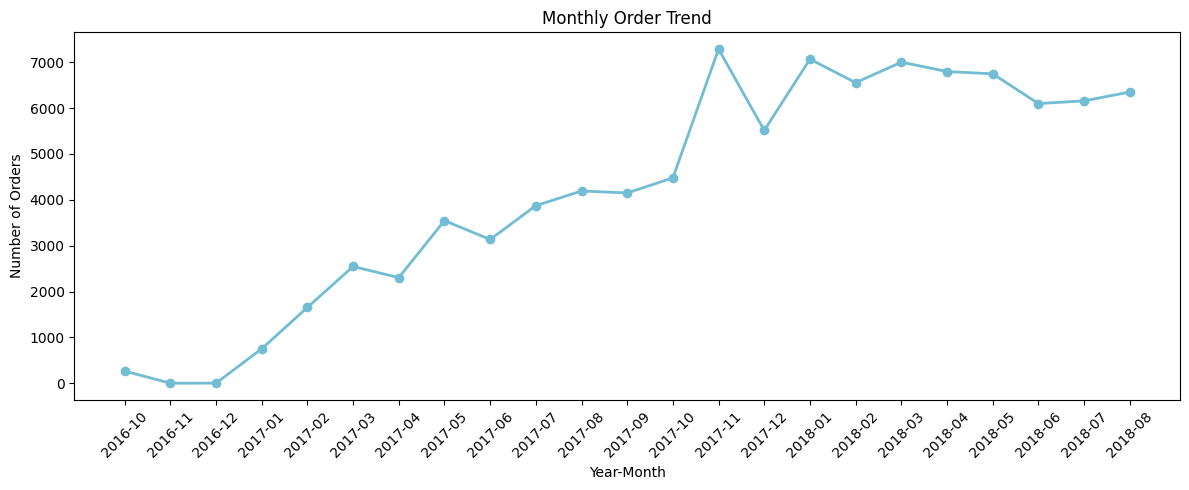

In [99]:
# Membuat visualisasi tren jumlah order perbulan
plt.figure(figsize=(12,5))
plt.plot(
    orders_per_month["year_month"],
    orders_per_month["order_count"],
    marker="o",
    linewidth=2,
    color="#72BCD4"
)
plt.xticks(rotation=45)
plt.title("Monthly Order Trend")
plt.xlabel("Year-Month")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()

**Insight:**
- Jumlah transaksi menunjukkan tren meningkat secara konsisten sejak awal periode (akhir 2016) hingga mencapai puncaknya di akhir 2017.
- Terdapat lonjakan signifikan sekitar Q4 2017, yang mengindikasikan adanya:
  - peningkatan aktivitas pelanggan, atau
  - kemungkinan efek musiman (event besar, promo akhir tahun).
- Memasuki tahun 2018, jumlah order cenderung stabil di level tinggi, meskipun terdapat fluktuasi kecil antar bulan.
- Tidak terlihat penurunan ekstrem, menandakan basis pelanggan yang relatif stabil.

In [100]:
# Menghitung total pendapatan perbulan berdasarkan waktu pembelian
revenue_per_month = (
    all_df
    .set_index("order_purchase_timestamp")
    .resample("ME")["payment_value"]
    .sum()
    .reset_index()
)
# Membuat kolom year-month untuk analisis tren pendapatan
revenue_per_month["year_month"] = (
    revenue_per_month["order_purchase_timestamp"]
    .dt.to_period("M")
    .astype(str)
)
# Menampilkan data
revenue_per_month

,order_purchase_timestamp,payment_value,year_month
0,2016-10-31,61746.94,2016-10
1,2016-11-30,0.00,2016-11
2,2016-12-31,19.62,2016-12
3,2017-01-31,176491.49,2017-01
4,2017-02-28,325782.66,2017-02
5,2017-03-31,505735.83,2017-03
6,2017-04-30,456108.32,2017-04
7,2017-05-31,701313.60,2017-05
8,2017-06-30,585400.98,2017-06
9,2017-07-31,716069.98,2017-07


In [101]:
# Mengonversi total pendapatan ke satuan jutaan
revenue_per_month["total_revenue_million"] = (
    revenue_per_month["payment_value"] / 1_000_000
)

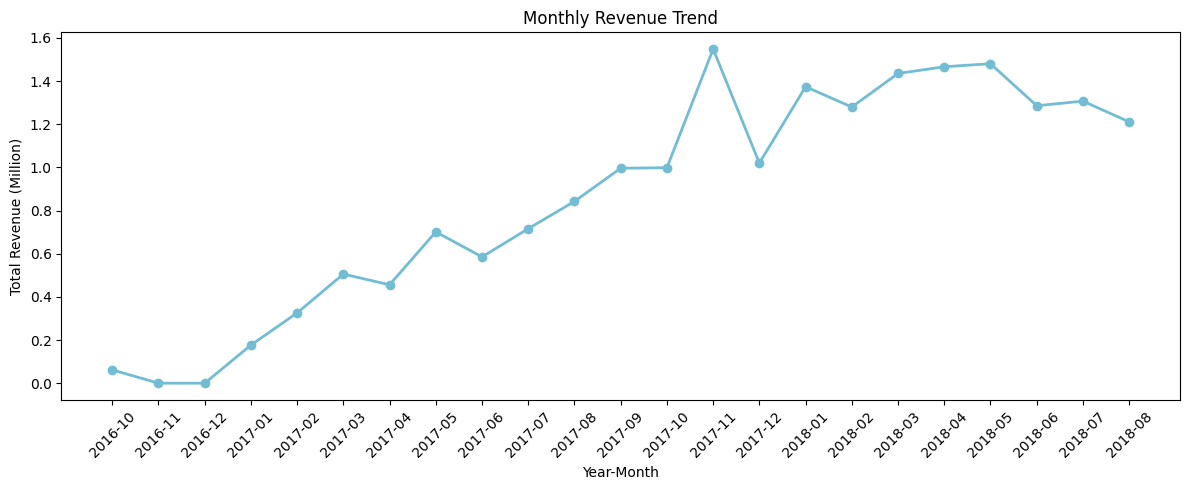

In [102]:
# Membuat visualisasi tren total pendapatan perbulan
plt.figure(figsize=(12,5))
plt.plot(
    revenue_per_month["year_month"],
    revenue_per_month["total_revenue_million"],
    marker="o",
    linewidth=2,
    color="#72BCD4"
)
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.xlabel("Year-Month")
plt.ylabel("Total Revenue (Million)")
plt.tight_layout()
plt.show()

**Insight:**
- Pola revenue mengikuti arah yang sama dengan jumlah order, yaitu meningkat dari waktu ke waktu.
- Puncak revenue juga terjadi di akhir 2017, selaras dengan lonjakan order.
- Pada beberapa bulan, revenue mengalami fluktuasi lebih tajam dibandingkan order, yang mengindikasikan:
   - variasi nilai transaksi (Average Order Value / AOV), atau
   - pergeseran jenis produk yang dibeli.
- Sepanjang tahun 2018, revenue tetap tinggi namun lebih volatil, meskipun jumlah order relatif stabil.

### 2. Produk kategori apa yang memiliki performa penjualan terbaik dan terburuk berdasarkan jumlah item terjual?

In [103]:
# Menghitung total item terjual pada tiap product category
sum_order_items_df = (
    all_df
    .groupby("product_category_name_english")
    .agg({
        "order_item_id": "count"
    })
    .rename(columns={"order_item_id": "total_items_sold"})
    .sort_values("total_items_sold", ascending=False)
    .reset_index()
)

In [104]:
# Mengambil 5 kategori product berdasarkan jumlah tertinggi
top_5 = sum_order_items_df.head(5)
# Mengambil 5 kategori product berdasarkan jumlah terendah
bottom_5 = (
    sum_order_items_df
    .tail(5)
    .sort_values("total_items_sold", ascending=True)
)
# Menampilkan kategori produk terbaik dan terburuk
display(top_5)
display(bottom_5)

,product_category_name_english,total_items_sold
0,bed_bath_table,11650
1,health_beauty,9759
2,sports_leisure,8733
3,furniture_decor,8557
4,computers_accessories,7898


,product_category_name_english,total_items_sold
71,security_and_services,2
70,fashion_childrens_clothes,7
69,cds_dvds_musicals,14
68,la_cuisine,16
67,arts_and_craftmanship,24


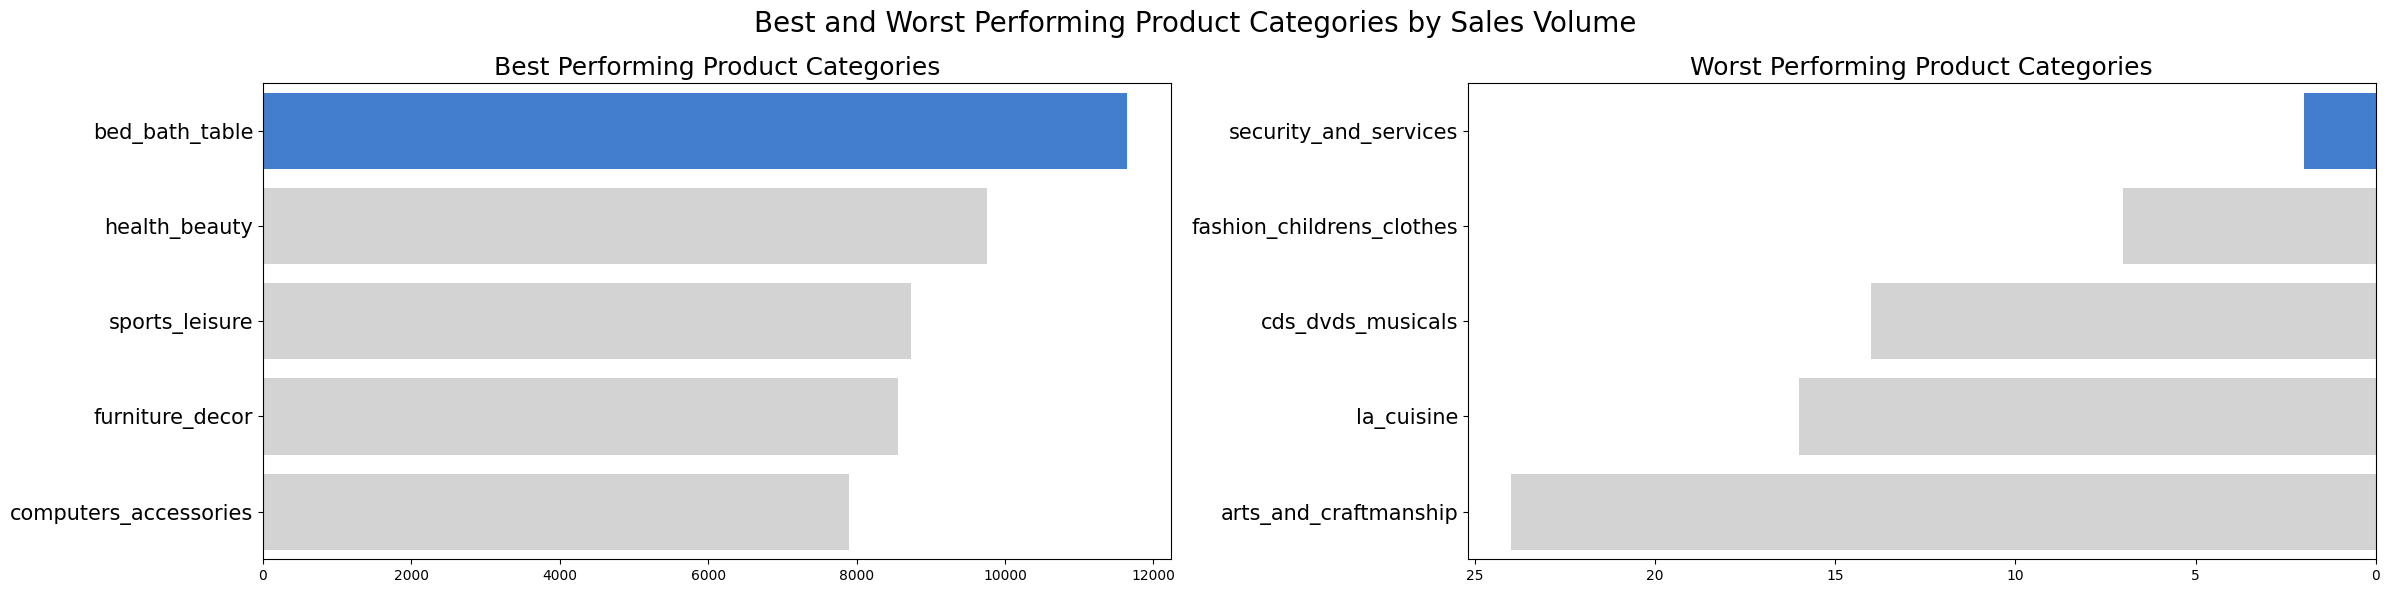

In [105]:
colors_top = ["#2C7BE5"] + ["#D3D3D3"] * (len(top_5) - 1)
colors_bottom = ["#2C7BE5"] + ["#D3D3D3"] * (len(bottom_5) - 1)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
# Visualisasi product dengan penjualan tertinggi
sns.barplot(
    x="total_items_sold",
    y="product_category_name_english",
    hue="product_category_name_english",
    data=top_5,
    palette=colors_top,
    ax=ax[0]
)
ax[0].set_title("Best Performing Product Categories", fontsize=18)
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].tick_params(axis='y', labelsize=15)
# Visualisasi product dengan penjualan terendah
sns.barplot(
    x="total_items_sold",
    y="product_category_name_english",
    hue="product_category_name_english",
    data=bottom_5,
    palette=colors_bottom,
    ax=ax[1]
)
ax[1].set_title("Worst Performing Product Categories", fontsize=18)
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].invert_xaxis()
plt.suptitle(
    "Best and Worst Performing Product Categories by Sales Volume",
    fontsize=20
)
plt.tight_layout()
plt.show()

**Insight:**
- Kategori dengan **jumlah item terjual tertinggi** didominasi oleh:
  - **bed_bath_table**
  - **health_beauty**
  - **sports_leisure**
  - **furniture_decor**
  - **computers_accessories**  
  Hal ini menunjukkan bahwa kategori tersebut memiliki **permintaan pasar yang tinggi dan stabil**.

- Sebaliknya, kategori dengan **jumlah item terjual terendah** meliputi:
  - **security_and_services**
  - **fashion_childrens_clothes**
  - **cds_dvds_musicals**
  - **la_cuisine**
  - **arts_and_craftmanship**  
  Rendahnya volume penjualan mengindikasikan bahwa kategori ini bersifat **niche** atau memiliki **minat pasar yang relatif kecil**.

### 3. Bagaimana distribusi pelanggan dan transaksi berdasarkan metode pembayaran serta wilayah (state & city), dan apa implikasinya terhadap perilaku pelanggan?

In [106]:
# Menghitung jumlah customer berdasarkan metode pembayaran
bypayment_df = (
    all_df
    .groupby("payment_type")["customer_id"]
    .nunique()
    .reset_index()
    .rename(columns={"customer_id": "customer_count"})
    .sort_values("customer_count", ascending=False)
)
# Menampilkan data
bypayment_df

,payment_type,customer_count
1,credit_card,74304
0,boleto,19191
3,voucher,3679
2,debit_card,1485


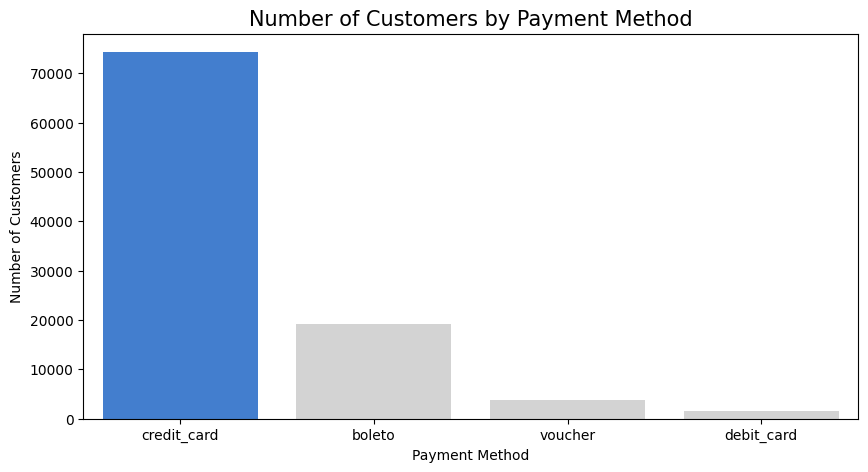

In [107]:
# Visualisasi jumlah customer berdasarkan metode pembayaran
plt.figure(figsize=(10,5))
colors = ["#2C7BE5"] + ["#D3D3D3"] * (len(bypayment_df) - 1)
sns.barplot(
    x="payment_type",
    hue="payment_type",
    y="customer_count",
    data=bypayment_df,
    palette=colors
)
plt.title("Number of Customers by Payment Method", fontsize=15)
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers")
plt.show()

**Insight:**
- Credit card merupakan metode pembayaran yang paling dominan, dengan jumlah pelanggan jauh melampaui metode lainnya.
- Boleto menempati posisi kedua, menunjukkan masih adanya preferensi pembayaran non-kartu di sebagian segmen pelanggan.
- Voucher dan debit card digunakan oleh sebagian kecil pelanggan, menandakan metode ini bersifat komplementer, bukan utama.
- Insight Perilaku:
   - Pelanggan cenderung memilih metode pembayaran yang praktis, cepat, dan fleksibel.
   - Tingginya penggunaan credit card mengindikasikan tingkat kepercayaan pelanggan terhadap sistem pembayaran digital serta potensi transaksi bernilai lebih tinggi.

In [108]:
# Menghitung jumlah customer berdasarkan state
bystate_df = (
    all_df
    .groupby("customer_state")["customer_id"]
    .nunique()
    .reset_index()
    .rename(columns={"customer_id": "customer_count"})
    .sort_values("customer_count", ascending=False)
    .head(10)
)
# Menampilkan data
bystate_df

,customer_state,customer_count
25,SP,40500
18,RJ,12350
10,MG,11354
22,RS,5345
17,PR,4923
23,SC,3546
4,BA,3256
6,DF,2080
7,ES,1995
8,GO,1957


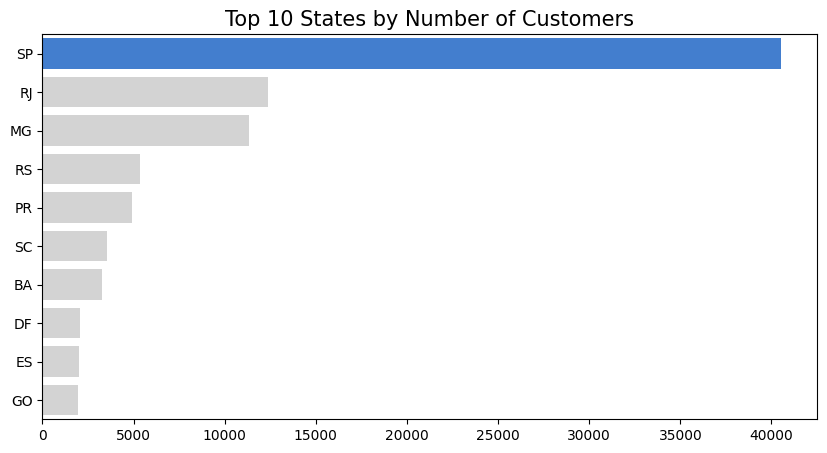

In [109]:
# Visualisasi jumlah customer berdasarkan state
plt.figure(figsize=(10,5))
colors = ["#2C7BE5"] + ["#D3D3D3"] * (len(bystate_df) - 1)
sns.barplot(
    x="customer_count",
    y="customer_state",
    hue="customer_state",
    data=bystate_df,
    palette=colors
)
plt.title("Top 10 States by Number of Customers", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Insight:**
- State SP (São Paulo) mendominasi jumlah pelanggan secara signifikan dibanding state lain.
- State besar lainnya seperti RJ (Rio de Janeiro) dan MG (Minas Gerais) berada di posisi berikutnya, namun dengan selisih yang cukup besar dari SP.
- Distribusi pelanggan tidak merata dan cenderung terpusat di beberapa state utama.
- Insight Wilayah:
  - Aktivitas bisnis dan transaksi sangat terkonsentrasi di wilayah dengan kepadatan penduduk dan aktivitas ekonomi tinggi.
  - State di luar Top 3 berkontribusi relatif kecil, menunjukkan adanya potensi pasar yang belum tergarap secara optimal.

In [110]:
# Menghitung jumlah customer berdasarkan city
bycity_df = (
    all_df
    .groupby("customer_city")["customer_id"]
    .nunique()
    .reset_index()
    .rename(columns={"customer_id": "customer_count"})
    .sort_values("customer_count", ascending=False)
    .head(10)
)
# Menampilkan data
bycity_df

,customer_city,customer_count
3563,sao paulo,15045
3126,rio de janeiro,6601
449,belo horizonte,2697
553,brasilia,2071
1135,curitiba,1489
700,campinas,1406
2936,porto alegre,1342
3218,salvador,1188
1518,guarulhos,1144
3398,sao bernardo do campo,911


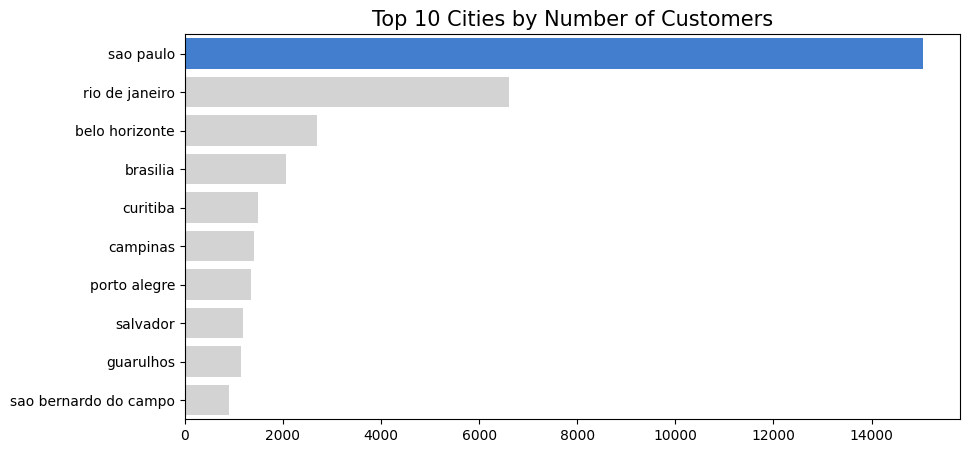

In [111]:
# Visualisasi jumlah customer berdasarkan city
plt.figure(figsize=(10,5))
colors = ["#2C7BE5"] + ["#D3D3D3"] * (len(bycity_df) - 1)
sns.barplot(
    x="customer_count",
    y="customer_city",
    hue="customer_city",
    data=bycity_df,
    palette=colors
)
plt.title("Top 10 Cities by Number of Customers", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Insight:**
- Sao Paulo (city) menjadi kota dengan jumlah pelanggan tertinggi secara dominan.
- Kota besar lain seperti Rio de Janeiro, Belo Horizonte, dan Brasília mengikuti, namun dengan gap yang cukup besar.
- Sebagian besar kota dalam Top 10 merupakan kota metropolitan atau pusat ekonomi regional.
- Insight Lokasi:
  - Konsentrasi pelanggan sangat kuat di kota metropolitan, yang umumnya memiliki:
  - Akses logistik lebih baik
  - Literasi digital lebih tinggi
  - Daya beli masyarakat yang lebih kuat

## RFM(Recency, Frequency, Monetary) Analysis

**Alasan Penggunaan Teknik RFM (Recency, Frequency, Monetary) Analysis :**
Teknik RFM Analysis digunakan karena mampu memberikan gambaran perilaku pelanggan secara komprehensif berdasarkan aktivitas transaksi aktual, bukan sekadar demografi dasar.

Alasan utama penggunaan metode ini antara lain:
- ***Merepresentasikan perilaku pelanggan secara nyata.***
RFM mengukur seberapa baru pelanggan bertransaksi (Recency), seberapa sering mereka bertransaksi (Frequency), dan seberapa besar nilai transaksi yang dihasilkan (Monetary).
- ***Efektif untuk dataset transaksi historis.***
Dataset yang digunakan memiliki informasi lengkap terkait waktu transaksi, jumlah transaksi, dan nilai pembayaran, sehingga sangat sesuai untuk pendekatan RFM.
- ***Mudah diinterpretasikan dan diterapkan secara bisnis.***
Hasil RFM dapat langsung diterjemahkan ke dalam strategi bisnis seperti retensi pelanggan, reaktivasi pelanggan pasif, dan pengembangan loyalitas.
- ***Mendukung segmentasi pelanggan berbasis nilai.***
Metode ini memungkinkan pengelompokan pelanggan berdasarkan kontribusi ekonominya, bukan hanya jumlah pelanggan.

**Tujuan :**
Metode RFM Analysis digunakan karena mampu memberikan gambaran perilaku pelanggan secara komprehensif berdasarkan aktivitas transaksi aktual, bukan sekadar demografi dasar.

Alasan utama penggunaan metode ini antara lain:

- ***Merepresentasikan perilaku pelanggan secara nyata.***
RFM mengukur seberapa baru pelanggan bertransaksi (Recency), seberapa sering mereka bertransaksi (Frequency), dan seberapa besar nilai transaksi yang dihasilkan (Monetary).
- ***Efektif untuk dataset transaksi historis.***
Dataset yang digunakan memiliki informasi lengkap terkait waktu transaksi, jumlah transaksi, dan nilai pembayaran, sehingga sangat sesuai untuk pendekatan RFM.
- ***Mudah diinterpretasikan dan diterapkan secara bisnis.***
Hasil RFM dapat langsung diterjemahkan ke dalam strategi bisnis seperti retensi pelanggan, reaktivasi pelanggan pasif, dan pengembangan loyalitas.
- ***Mendukung segmentasi pelanggan berbasis nilai.***
Metode ini memungkinkan pengelompokan pelanggan berdasarkan kontribusi ekonominya, bukan hanya jumlah pelanggan.

In [112]:
# Membentuk data RFM dengan mengelompokkan transaksi percustomer
rfm_df = (
    all_df
    .groupby("customer_id", as_index=False)
    .agg({
        "order_purchase_timestamp": "max",   # tanggal transaksi terakhir
        "order_id": "nunique",               # jumlah transaksi
        "payment_value": "sum"               # total nilai belanja
    })
)
# Mengganti nama kolom sesuai komponen RFM
rfm_df.columns = [
    "customer_id",
    "last_order_date",
    "frequency",
    "monetary"
]
# Menampilkan baris awal data
rfm_df.head()

,customer_id,last_order_date,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,107.01


In [113]:
# Mengambil tanggal terakhir transaksi
recent_date = all_df["order_purchase_timestamp"].max()
# Menghitung recency
rfm_df["recency"] = (
    recent_date - rfm_df["last_order_date"]
).dt.days
# Menghapus kolom last order date
rfm_df.drop(columns="last_order_date", inplace=True)
# Menampilkan 5 data awal
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,287
1,000161a058600d5901f007fab4c27140,1,67.41,409
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,547
3,0002414f95344307404f0ace7a26f1d5,1,179.35,378
4,000379cdec625522490c315e70c7a9fb,1,107.01,149


In [114]:
# Menampilkan ringkasan statistik data numerik
rfm_df.describe()

,frequency,monetary,recency
count,96477.0,96477.000000,96477.000000
mean,1.0,204.983161,239.116453
std,0.0,621.239658,152.830149
min,1.0,9.590000,0.000000
25%,1.0,62.660000,115.000000
50%,1.0,109.500000,220.000000
75%,1.0,195.530000,349.000000
max,1.0,109312.640000,695.000000


In [115]:
# Menampilkan 5 data dengan urutan berdasarkan jumlah recency terkecil
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
27738,49a6ae8a95c6a78d90945b983ab1ecfc,1,557.72,0
74844,c5c43d14a781c58ed1fdac7c9652f18f,1,712.90,0
86879,e60df9449653a95af4549bbfcb18a6eb,1,1021.92,0
41385,6e353700bc7bcdf6ebc15d6de16d7002,1,61.29,0
10693,1c3d8766b5f8b24d7e95001ce31d1d38,1,14.89,0


In [116]:
# Menampilkan 5 data dengan urutan berdasarkan jumlah frequency terbesar
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
96476,ffffa3172527f765de70084a7e53aae8,1,91.00,361
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,287
1,000161a058600d5901f007fab4c27140,1,67.41,409
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,547
3,0002414f95344307404f0ace7a26f1d5,1,179.35,378


In [117]:
# Menampilkan 5 data dengan urutan berdasarkan jumlah monetary terbesar
rfm_df.sort_values(by="monetary", ascending=False).head(5)

,customer_id,frequency,monetary,recency
8293,1617b1357756262bfa56ab541c47bc16,1,109312.64,333
71681,bd5d39761aa56689a265d95d8d32b8be,1,45256.00,371
71931,be1b70680b9f9694d8c70f41fa3dc92b,1,44048.00,187
2007,05455dfa7cd02f13d132aa7a6a9729c6,1,36489.24,278
12044,1ff773612ab8934db89fd5afa8afe506,1,30186.00,132


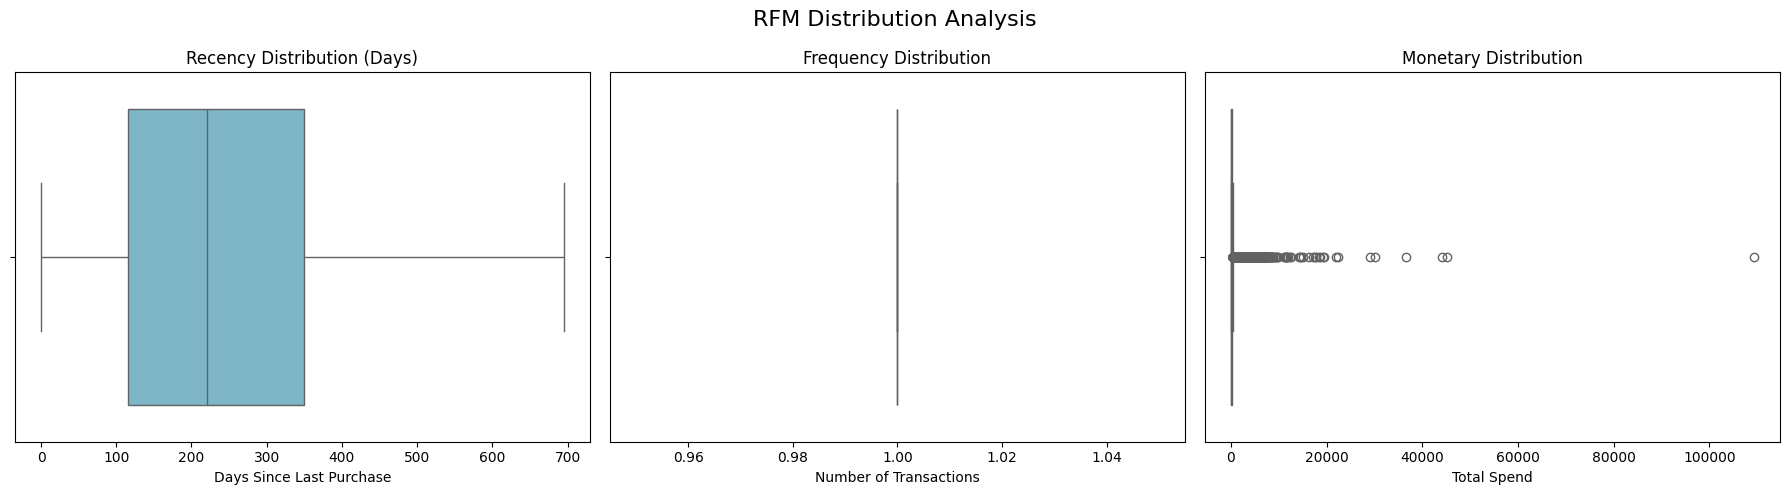

In [118]:
# Membuat visualisasi distribusi RFM menggunakan boxplot
plt.figure(figsize=(18, 5))
# Recency
plt.subplot(1, 3, 1)
sns.boxplot(
    x=rfm_df["recency"],
    color="#72BCD4"
)
plt.title("Recency Distribution (Days)")
plt.xlabel("Days Since Last Purchase")
# Frequency
plt.subplot(1, 3, 2)
sns.boxplot(
    x=rfm_df["frequency"],
    color="#72BCD4"
)
plt.title("Frequency Distribution")
plt.xlabel("Number of Transactions")
# Monetary
plt.subplot(1, 3, 3)
sns.boxplot(
    x=rfm_df["monetary"],
    color="#72BCD4"
)
plt.title("Monetary Distribution")
plt.xlabel("Total Spend")
plt.suptitle("RFM Distribution Analysis", fontsize=16)
plt.tight_layout()
plt.show()

**Insight RFM Distribution Analysis**

- **Recency**
  - Distribusi recency menunjukkan sebaran yang cukup lebar, mulai dari pelanggan yang baru saja melakukan transaksi hingga pelanggan yang sudah lama tidak bertransaksi.
  - Nilai median yang berada di tengah rentang data mengindikasikan bahwa sebagian besar pelanggan tidak melakukan pembelian dalam waktu dekat.
  - Hal ini menunjukkan adanya potensi pelanggan *dormant* yang dapat ditargetkan melalui strategi reaktivasi.

- **Frequency**
  - Distribusi frequency sangat terkonsentrasi pada nilai 1, yang berarti mayoritas pelanggan hanya melakukan satu kali transaksi.
  - Pola ini mengindikasikan rendahnya tingkat *repeat purchase* pada dataset.
  - Temuan ini menunjukkan bahwa fokus bisnis saat ini lebih banyak pada akuisisi pelanggan baru dibandingkan mempertahankan pelanggan lama.

- **Monetary**
  - Distribusi monetary bersifat sangat *right-skewed*, di mana sebagian besar pelanggan memiliki total pengeluaran yang relatif rendah.
  - Terdapat sejumlah kecil pelanggan dengan nilai pengeluaran yang sangat tinggi (*high-value customers*).
  - Kondisi ini menegaskan bahwa kontribusi pendapatan terbesar berasal dari segmen pelanggan tertentu, sehingga segmentasi berbasis RFM menjadi penting untuk strategi retensi dan loyalitas.

#### Mengurutkan customer berdasarkan recency, frequency, & monetary score

In [119]:
# Membuat kolom peringkat untuk masing-masing komponen RFM
rfm_df["r_rank"] = rfm_df["recency"].rank(ascending=False)
rfm_df["f_rank"] = rfm_df["frequency"].rank(ascending=True)
rfm_df["m_rank"] = rfm_df["monetary"].rank(ascending=True)
# Menampilkan 5 data awal
rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,287,33035.0,48239.0,50241.0
1,000161a058600d5901f007fab4c27140,1,67.41,409,15985.0,48239.0,27409.0
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,547,2612.5,48239.0,72337.5
3,0002414f95344307404f0ace7a26f1d5,1,179.35,378,20118.0,48239.0,69412.0
4,000379cdec625522490c315e70c7a9fb,1,107.01,149,64520.5,48239.0,47254.5


In [120]:
# Melakukan normalisasi ranking dengan skala 0-100
rfm_df["r_rank_norm"] = (rfm_df["r_rank"] / rfm_df["r_rank"].max()) * 100
rfm_df["f_rank_norm"] = (rfm_df["f_rank"] / rfm_df["f_rank"].max()) * 100
rfm_df["m_rank_norm"] = (rfm_df["m_rank"] / rfm_df["m_rank"].max()) * 100
# Menghapus kolom peringkat
rfm_df.drop(columns=["r_rank", "f_rank", "m_rank"], inplace=True)
# Menampilkan 5 data awal
rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,287,34.246291,100.0,52.075624
1,000161a058600d5901f007fab4c27140,1,67.41,409,16.571121,100.0,28.409880
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,547,2.708292,100.0,74.979011
3,0002414f95344307404f0ace7a26f1d5,1,179.35,378,20.855665,100.0,71.946682
4,000379cdec625522490c315e70c7a9fb,1,107.01,149,66.886267,100.0,48.980068


In [121]:
# Menghitung score RFM berbobot berdasarkan RFM
rfm_df["RFM_score"] = (
    0.15 * rfm_df["r_rank_norm"] +
    0.28 * rfm_df["f_rank_norm"] +
    0.57 * rfm_df["m_rank_norm"]
)
# Menyesuaikan skala skor RFM dan membulatkannya
rfm_df['RFM_score'] *= 0.05
rfm_df["RFM_score"] = rfm_df["RFM_score"].round(2)
# Menampilkan 7 data awal
rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,3.14
1,000161a058600d5901f007fab4c27140,2.33
2,0001fd6190edaaf884bcaf3d49edf079,3.56
3,0002414f95344307404f0ace7a26f1d5,3.61
4,000379cdec625522490c315e70c7a9fb,3.30
5,0004164d20a9e969af783496f3408652,2.34
6,000419c5494106c306a97b5635748086,2.32


#### Segmentasi customer berdasarkan RFM_score

In [122]:
# Melakukan segmentasi customer berdasarkan nilai RFM score
rfm_df["customer_segment"] = np.where(
    rfm_df["RFM_score"] >= 4.5, "Top customers",
    np.where(
        rfm_df["RFM_score"] >= 4.0, "High value customer",
        np.where(
            rfm_df["RFM_score"] >= 3.0, "Medium value customer",
            np.where(
                rfm_df["RFM_score"] >= 1.6, "Low value customers",
                "Lost customers"
            )
        )
    )
)
# Menampilkan 20 data awal customer, RFM score, dan segmen
rfm_df[["customer_id", "RFM_score", "customer_segment"]].head(20)

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,3.14,Medium value customer
1,000161a058600d5901f007fab4c27140,2.33,Low value customers
2,0001fd6190edaaf884bcaf3d49edf079,3.56,Medium value customer
3,0002414f95344307404f0ace7a26f1d5,3.61,Medium value customer
4,000379cdec625522490c315e70c7a9fb,3.30,Medium value customer
5,0004164d20a9e969af783496f3408652,2.34,Low value customers
6,000419c5494106c306a97b5635748086,2.32,Low value customers
7,00046a560d407e99b969756e0b10f282,3.69,Medium value customer
8,00050bf6e01e69d5c0fd612f1bcfb69c,2.69,Low value customers
9,000598caf2ef4117407665ac33275130,4.93,Top customers


In [123]:
# Menghitung jumlah customer berdasarkan segmen RFM
customer_segment_df = (
    rfm_df
    .groupby("customer_segment", as_index=False)
    .customer_id.nunique()
    .rename(columns={"customer_id": "customer_count"})
    .sort_values("customer_count", ascending=False)
)
# Menampilkan data
customer_segment_df

,customer_segment,customer_count
2,Low value customers,40406
3,Medium value customer,33689
0,High value customer,15741
4,Top customers,5715
1,Lost customers,926


In [124]:
# Menyimpan urutan segmen untuk keperluan visualisasi
segment_order = customer_segment_df["customer_segment"].tolist()

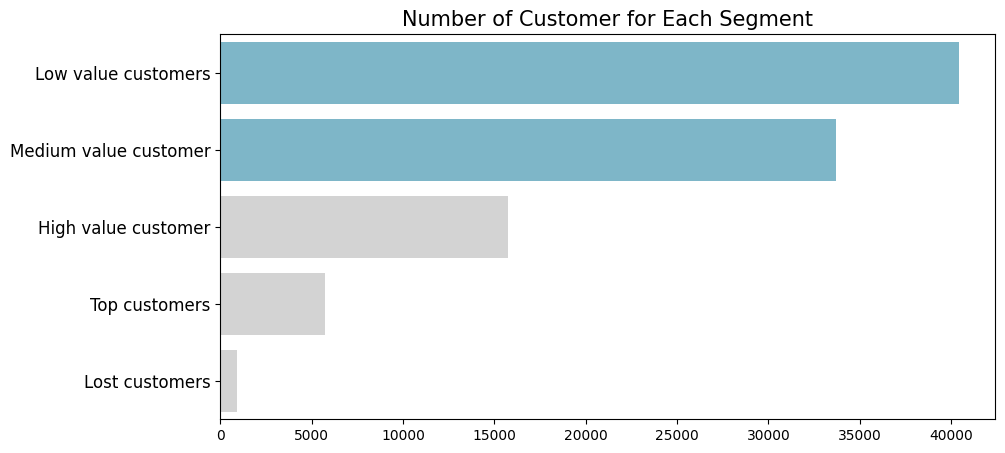

In [125]:
# Visualisasi jumlah customer berdasarkan segmen RFM
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(10, 5))
sns.barplot(
    data=customer_segment_df,
    x="customer_count",
    y="customer_segment",
    hue="customer_segment",
    order=segment_order,
    palette=colors_,
)
plt.title("Number of Customer for Each Segment", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis="y", labelsize=12)
plt.show()

**Insight:**
- **Sebagian besar pelanggan berada pada segmen *Low Value* dan *Medium Value***  
  Hal ini menunjukkan mayoritas customer masih memiliki nilai transaksi yang relatif rendah hingga menengah, sehingga terdapat peluang besar untuk meningkatkan kontribusi pendapatan.

- **Segmen *Low Value Customers* merupakan kelompok dengan jumlah pelanggan terbanyak**  
  Customer pada segmen ini cenderung memiliki frekuensi transaksi rendah atau nilai belanja kecil, sehingga berpotensi memberikan kontribusi revenue yang terbatas jika tidak dilakukan strategi peningkatan nilai.

- **Segmen *Medium Value Customers* menempati posisi kedua terbesar**  
  Kelompok ini menjadi target paling potensial untuk ditingkatkan ke segmen *High Value Customers* melalui strategi seperti promo terpersonalisasi, loyalty program, atau bundling produk.

- **Jumlah *High Value Customers* relatif lebih sedikit, namun memiliki peran penting**  
  Meskipun populasinya tidak besar, pelanggan dalam segmen ini memberikan kontribusi pendapatan yang signifikan dan perlu dipertahankan melalui strategi retensi yang tepat.

- **Segmen *Top Customers* memiliki jumlah paling kecil namun bernilai strategis**  
  Pelanggan ini memiliki skor RFM tertinggi dan berpotensi memberikan kontribusi revenue terbesar per pelanggan, sehingga perlu perlakuan khusus seperti program VIP atau reward eksklusif.

- **Segmen *Lost Customers* merupakan kelompok dengan jumlah paling sedikit**  
  Hal ini mengindikasikan sebagian besar pelanggan masih aktif, namun tetap diperlukan strategi reaktivasi untuk mencegah bertambahnya jumlah pelanggan yang benar-benar berhenti bertransaksi.

## Conclusion

- **Conclution Pertanyaan 1 : Bagaimana tren jumlah transaksi (order) dan total pendapatan (revenue) dari waktu ke waktu (bulanan), serta apakah keduanya menunjukkan pola pertumbuhan yang sejalan?**
  - Jumlah order dan total revenue menunjukkan pola pertumbuhan yang sejalan sepanjang periode observasi.
  - Puncak kinerja terjadi pada akhir tahun 2017, yang kemungkinan dipengaruhi faktor musiman atau strategi bisnis tertentu.
  - Tahun 2018 menunjukkan fase stabilisasi, di mana volume transaksi tinggi dapat dipertahankan meskipun pertumbuhan melambat.
  - Secara keseluruhan, bisnis berada dalam kondisi bertumbuh dan stabil, dengan peluang optimalisasi pada nilai transaksi per pelanggan, bukan hanya volume order.
- **Conclution Pertanyaan 2 : Produk kategori apa yang memiliki performa penjualan terbaik dan terburuk berdasarkan jumlah item terjual?**
  - Kategori produk dengan jumlah item terjual tertinggi didominasi oleh:
    - bed_bath_table
    - health_beauty
    - sports_leisure
    - furniture_decor
    - computers_accessories
  - Tingginya volume penjualan pada kategori tersebut menunjukkan:
    - Produk bersifat kebutuhan rutin / lifestyle
    - Permintaan pasar tinggi dan stabil
    - Berpotensi menjadi driver utama total transaksi
  - Kategori dengan jumlah item terjual terendah meliputi:
    - security_and_services
    - fashion_childrens_clothes
    - cds_dvds_musicals
    - la_cuisine
    - arts_and_craftmanship
  - Rendahnya volume penjualan pada kategori tersebut mengindikasikan:
    - Pasar yang lebih niche
    - Minat pelanggan yang relatif terbatas
    - Kontribusi kecil terhadap total volume penjualan
  - Implikasi bisnis:
    - Kategori dengan penjualan tinggi layak menjadi fokus stok, promosi, dan campaign
    - Kategori dengan penjualan rendah perlu evaluasi strategi (promosi, target market, atau efisiensi inventori)
- **Conclution Pertanyaan 3 : Bagaimana distribusi pelanggan dan transaksi berdasarkan metode pembayaran serta wilayah (state & city), dan apa implikasinya terhadap perilaku pelanggan?**
  - Distribusi pelanggan dan transaksi menunjukkan pola konsentrasi yang kuat baik dari sisi metode pembayaran maupun wilayah geografis.
  - Credit card menjadi metode pembayaran utama, mencerminkan preferensi pelanggan terhadap kemudahan dan kecepatan transaksi.
  - Secara geografis, pelanggan sangat terpusat di state dan city besar, khususnya São Paulo, yang berperan sebagai pusat utama aktivitas transaksi.
  - Implikasi utama terhadap perilaku pelanggan:
    - Pelanggan di wilayah urban cenderung lebih aktif dan adaptif terhadap pembayaran digital.
    - Wilayah non-metropolitan dan metode pembayaran alternatif masih memiliki potensi pertumbuhan, namun membutuhkan strategi khusus (edukasi, promosi, atau insentif).
- **Clonclution RFM Analysis**
  - Mayoritas pelanggan berada pada segmen Low Value dan Medium Value, yang menunjukkan bahwa sebagian besar pelanggan memiliki nilai transaksi relatif rendah hingga menengah.
  - Distribusi Recency yang cukup lebar mengindikasikan adanya pelanggan aktif sekaligus pelanggan yang sudah lama tidak melakukan transaksi, sehingga membuka peluang strategi reaktivasi.
  - Frequency yang sangat terkonsentrasi pada nilai rendah menunjukkan rendahnya tingkat repeat purchase, menandakan pentingnya strategi peningkatan loyalitas pelanggan.
  - Distribusi Monetary yang sangat right-skewed menegaskan bahwa sebagian kecil pelanggan menyumbang kontribusi pendapatan terbesar.
  - Segmentasi RFM berhasil mengidentifikasi kelompok pelanggan strategis, khususnya High Value dan Top Customers, yang meskipun jumlahnya kecil namun memiliki peran penting terhadap revenue.
  - Dengan demikian, RFM Analysis terbukti efektif sebagai alat segmentasi pelanggan, membantu bisnis memahami perilaku pelanggan, menentukan prioritas strategi, serta mengoptimalkan upaya retensi dan peningkatan nilai pelanggan secara lebih terarah.

In [126]:
# Simpan dataset final untuk dashboard
all_df.to_csv("dashboard/main_data.csv", index=False)